### Importing the libraries:

In [45]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from keras.optimizers import Adam 
from keras.layers import Dropout

### Importing the data:

In [32]:
data = pd.read_csv("forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### Preprocessing the data:

In [33]:
# removing the month and day column as they are already one-hot encoded
data = data.iloc[:,2:]
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [34]:
# label encoding the target variable
label_encoder = preprocessing.LabelEncoder()
data['size_category']= label_encoder.fit_transform(data['size_category'])
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# getting the dataframe as arrays
array = data.values
x = array[:, :28]
y = array[:,28]
x.shape

(517, 28)

### Building the neural network:

In [36]:
model = Sequential()
model.add(Dense(12, input_dim=x.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 1s 8ms/step - loss: 0.6551 - accuracy: 0.7512 - val_loss: 0.6632 - val_accuracy: 0.6784
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.7690 - val_loss: 0.6525 - val_accuracy: 0.6784
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5229 - accuracy: 0.7797 - val_loss: 0.6087 - val_accuracy: 0.6901
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.7752 - val_loss: 0.5748 - val_accuracy: 0.7076
Epoch 5/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7575 - val_loss: 0.5795 - val_accuracy: 0.7251
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.8177 - val_loss: 0.4702 - val_accuracy: 0.7895
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.8204 - val_loss: 0.4482 - val_accuracy: 0.7895
Epoch 8/150
3

Epoch 59/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9799 - val_loss: 0.0658 - val_accuracy: 0.9591
Epoch 60/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0645 - val_accuracy: 0.9591
Epoch 61/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9966 - val_loss: 0.0788 - val_accuracy: 0.9591
Epoch 62/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9907 - val_loss: 0.1606 - val_accuracy: 0.9415
Epoch 63/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9881 - val_loss: 0.0676 - val_accuracy: 0.9474
Epoch 64/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0640 - val_accuracy: 0.9825
Epoch 65/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9888 - val_loss: 0.0695 - val_accuracy: 0.9708
Epoch 

In [39]:
scores = model.evaluate(x, y)
print(f"Accuracy: {model.metrics_names[1], scores[1]*100}%")

17/17 [==============================] - 0s 873us/step - loss: 0.0351 - accuracy: 0.9884
Accuracy: ('accuracy', 98.8394558429718)%


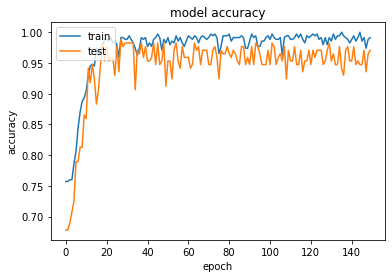

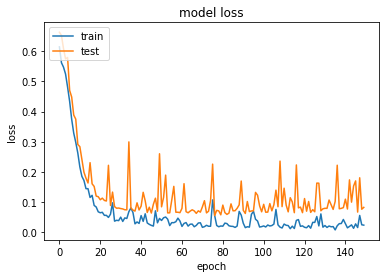

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###### Observation: we are getting a good accuracy in the above model, so hyperparameter tuning is not required. But we can find the best parameters using the below code

### Hyperparameter tuning:

#### Warning: Please note that this code will take hours to run                                 

In [42]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = x.shape[1],kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [46]:
model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=1.000, total=   1.5s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.250, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.524, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.680, total=   1.6s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.4s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2, score=0.699, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.5s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=1.000, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.7s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.750, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.0s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.524, total=   1.4s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.4s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.680, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.7s remaining:    0.0s


[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4, score=0.699, total=   1.1s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8, score=1.000, total=   1.7s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8, score=0.750, total=   1.2s
[CV] activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8 
[CV]  activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate

KeyboardInterrupt: 